# Hierarchical clustering

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from scipy.cluster.hierarchy import linkage

In [2]:
crime = pd.read_csv("crime_data.csv")

In [3]:
crime.head

<bound method NDFrame.head of         Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      24

In [4]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])

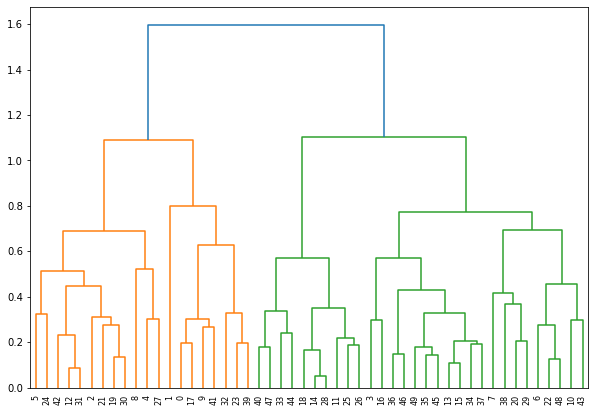

In [9]:
# create dendrogram
plt.figure(figsize=(10,7)) 
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [11]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(n_clusters=4)

In [12]:
# save clusters for chart
y = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y,columns=['Clusters'])

In [13]:
crime['h_clusterid'] = y

In [14]:
crime['h_clusterid'].value_counts()

0    18
1    13
2    12
3     7
Name: h_clusterid, dtype: int64

In [15]:
crime.head

<bound method NDFrame.head of         Unnamed: 0  Murder  Assault  UrbanPop  Rape  h_clusterid
0          Alabama    13.2      236        58  21.2            3
1           Alaska    10.0      263        48  44.5            1
2          Arizona     8.1      294        80  31.0            1
3         Arkansas     8.8      190        50  19.5            0
4       California     9.0      276        91  40.6            1
5         Colorado     7.9      204        78  38.7            1
6      Connecticut     3.3      110        77  11.1            0
7         Delaware     5.9      238        72  15.8            0
8          Florida    15.4      335        80  31.9            1
9          Georgia    17.4      211        60  25.8            3
10          Hawaii     5.3       46        83  20.2            0
11           Idaho     2.6      120        54  14.2            2
12        Illinois    10.4      249        83  24.0            1
13         Indiana     7.2      113        65  21.0         

In [16]:
crime.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.055556,140.055556,71.333333,18.683333
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.091667,76.000000,52.083333,11.833333
3,3,14.671429,251.285714,54.285714,21.685714


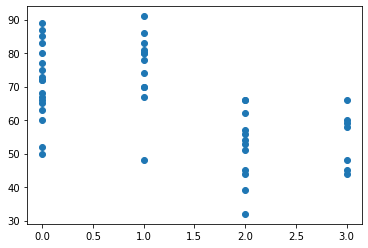

In [22]:
#plot cluster
plt.scatter(crime['h_clusterid'],crime['UrbanPop'])

# K-Means clustering

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [7]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime = scaler.fit_transform(crime.iloc[:,1:])

C:\Users\uniha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


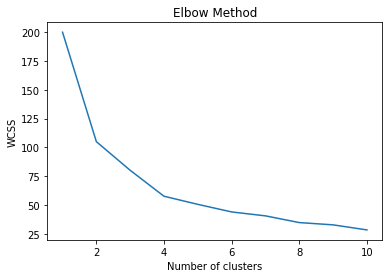

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crime)

KMeans(n_clusters=4, random_state=42)

In [10]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [11]:
#Assign clusters to the data set
crime['clusterid_new'] = clusters_new.labels_

In [12]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [13]:
crime.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


In [14]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


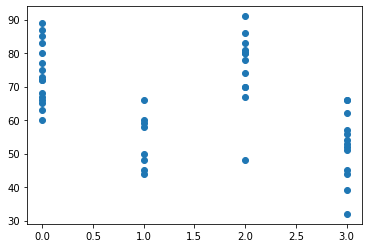

In [17]:
#plot cluster
plt.scatter(crime['clusterid_new'],crime['UrbanPop'])

# DBSCAN clustering

In [18]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df=crime.iloc[:,1:]

In [20]:
array=df.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   1. ],
       [ 10. , 263. ,  48. ,  44.5,   2. ],
       [  8.1, 294. ,  80. ,  31. ,   2. ],
       [  8.8, 190. ,  50. ,  19.5,   1. ],
       [  9. , 276. ,  91. ,  40.6,   2. ],
       [  7.9, 204. ,  78. ,  38.7,   2. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ],
       [ 15.4, 335. ,  80. ,  31.9,   2. ],
       [ 17.4, 211. ,  60. ,  25.8,   1. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   3. ],
       [ 10.4, 249. ,  83. ,  24. ,   2. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   3. ],
       [  6. , 115. ,  66. ,  18. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   3. ],
       [ 15.4, 249. ,  66. ,  22.2,   1. ],
       [  2.1,  83. ,  51. ,   7.8,   3. ],
       [ 11.3, 300. ,  67. ,  27.8,   2. ],
       [  4.4, 149. ,  85. ,  16.3,   0. ],
       [ 12.1, 255. ,  74. ,  35.1,   2. ],
       [  2.7,  72. ,  66. ,  14

In [21]:
stscaler = StandardScaler().fit(array)
x = stscaler.transform(array)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -0.38760987],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  0.45502028],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  0.45502028],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.38760987],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  0.45502028],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  0.45502028],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -1.23024001],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -1.23024001],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  0.45502028],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -0.38760987],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -1.23024001],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  1.29765042],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  0.45502028],
       [-0.13637203, -0.70012057, -0.0

In [22]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(x)

DBSCAN(eps=0.8, min_samples=6)

In [23]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [24]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [27]:
df_1 = pd.concat([df,cl],axis=1)
df_1

,Murder,Assault,UrbanPop,Rape,clusterid_new,cluster
0,13.2,236,58,21.2,1,-1
1,10.0,263,48,44.5,2,-1
2,8.1,294,80,31.0,2,-1
3,8.8,190,50,19.5,1,-1
4,9.0,276,91,40.6,2,-1
5,7.9,204,78,38.7,2,-1
6,3.3,110,77,11.1,0,-1
7,5.9,238,72,15.8,0,-1
8,15.4,335,80,31.9,2,-1
9,17.4,211,60,25.8,1,-1


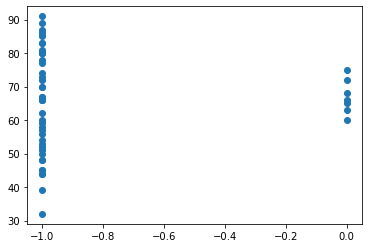

In [29]:
#plot cluster
plt.scatter(df_1['cluster'],df_1['UrbanPop'])